# Imports

In [1]:
import pandas as pd
import numpy as np
#!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
import os
import regex as re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [2]:
#!pip install contractions
import contractions
import unicodedata
#!pip install langdetect
from langdetect import detect
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns

# Reading the data into df

In [3]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import openpyxl

In [4]:
# Code to read csv file into colaboratory:
#pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
#file_url='https://docs.google.com/spreadsheets/d/1dMbKFS4LcgH_7KujW5JXw4Xdpti8DEx2/edit?usp=sharing&ouid=107129813669435911048&rtpof=true&sd=true'
#df = pd.read_excel(file_url, engine='openpyxl')
file_id = '1dMbKFS4LcgH_7KujW5JXw4Xdpti8DEx2'
downloaded = drive.CreateFile({'id': file_id})

In [7]:
downloaded.GetContentFile('input_data.xlsx')

In [8]:
!ls -lha input_data.xlsx

-rw-r--r-- 1 root root 927K Mar 15 11:46 input_data.xlsx


In [235]:
df = pd.read_excel('input_data.xlsx')

In [221]:
df

,Short description,Description,Caller,Assignment group,Languge
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,Loading...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,Loading...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,Loading...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,Loading...
...,...,...,...,...,...
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,Loading...
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,Loading...


In [11]:
df.shape

(8501, 5)

Identify Null

In [240]:
df.isnull().sum()

Short description    9
Description          1
Caller               1
Assignment group     1
Languge              0
dtype: int64

Short Description and Description have null values. Since this being an NLP problem and both short description and description are pointing to the intent of the ticket, it is decided to replace one with another if any of this is null

In [241]:
df['Description'].fillna(df['Short description'], inplace=True)
df['Short description'].fillna(df['Description'], inplace=True)

Checking again for nulls

In [242]:
df.isnull().sum()

Short description    1
Description          1
Caller               1
Assignment group     1
Languge              0
dtype: int64

In [245]:
df = df.dropna()

In [246]:
df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
Languge              0
dtype: int64

Identify duplicates

In [15]:
df.duplicated().sum()

84

In [16]:
df[df.duplicated()]

,Short description,Description,Caller,Assignment group,Languge
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0,Loading...
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0,Loading...
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0,Loading...
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0,Loading...
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\n\n...,bpctwhsn kzqsbmtp,GRP_8,Loading...
...,...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24,Loading...
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21,Loading...
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17,Loading...
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0,Loading...


Remove duplicates

In [17]:
df.drop_duplicates()

,Short description,Description,Caller,Assignment group,Languge
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,Loading...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,Loading...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,Loading...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,Loading...
...,...,...,...,...,...
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,Loading...
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,Loading...


# To Check unique Assignment Group

In [18]:
#checking number of assignment groups
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73', nan],
      dtype=object)

There are total 74 groups

Assignment Group Percentage

In [19]:
df_inc = df['Assignment group'].value_counts().reset_index()
df_inc['percentage'] = (df_inc['Assignment group']/df_inc['Assignment group'].sum())*100
df_inc.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


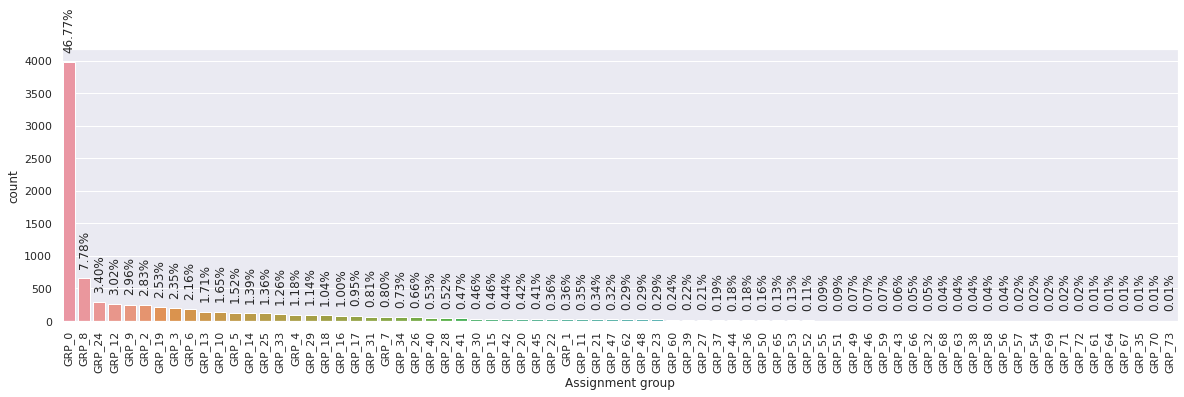

In [20]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=df, order=df["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(df.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')
#augmentation

Checking the most repeated top 10 groups

In [21]:
df_top_10 = df['Assignment group'].value_counts().nlargest(10).reset_index()
df_top_10

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


Checking the last 10 assignment groups

In [22]:
df_bottom_10 = df['Assignment group'].value_counts().nsmallest(10).reset_index()
df_bottom_10

,index,Assignment group
0,GRP_61,1
1,GRP_64,1
2,GRP_67,1
3,GRP_35,1
4,GRP_70,1
5,GRP_73,1
6,GRP_57,2
7,GRP_54,2
8,GRP_69,2
9,GRP_71,2


Checking the distirbution

In [23]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
_1_50_ticket = {'Description':' 1-50 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 1)& (df_inc['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 50)& (df_inc['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_inc[(df_inc['Assignment group'] > 100)])}
#append row to the dataframe
df_bins = df_bins.append([_1_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins


,Description,Ticket Count
0,1-50 ticket,44
1,51-100 ticket,9
2,>100 ticket,15


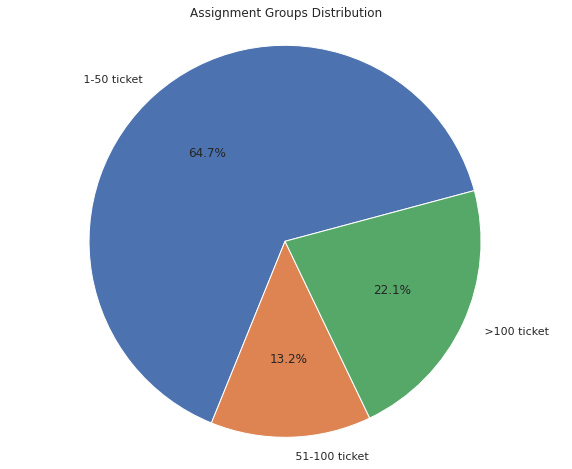

In [24]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

In [25]:
#checking the null values
df.isnull().sum()

Short description    1
Description          1
Caller               1
Assignment group     1
Languge              0
dtype: int64

In [26]:
#Checking the value of null
df[df['Description'].isnull()]

,Short description,Description,Caller,Assignment group,Languge
8500,NaN,NaN,NaN,NaN,0


In [27]:
#Replacing the null value with the short description value
df=df.replace({'Description':np.NaN},df[df['Short description']=='i am locked out of skype']['Short description'].to_string().split(maxsplit=1)[1])

In [28]:
#Checking if the value is actually replaced or not
df.iloc[4395]

Short description    i am locked out of skype
Description          i am locked out of skype
Caller                      viyglzfo ajtfzpkb
Assignment group                        GRP_0
Languge                            Loading...
Name: 4395, dtype: object

In [29]:
#Checking for the null values
df.isnull().sum()

Short description    1
Description          0
Caller               1
Assignment group     1
Languge              0
dtype: int64

Since we are mostly concerend with the description letting the short description null values be for  a moment

In [30]:
feature_df = df.filter(['Description','Assignment group'], axis=1)

In [31]:
#caluclating the word count
feature_df['word_count']=df['Description'].apply(lambda x:len(str(x).split()))
#printing 5 sample values
feature_df.sample(15)

,Description,Assignment group,word_count
5303,æŠ¥ç¨Žç”µè„‘ä¸_x008d_èƒ½è_x0081_”ç½‘ï¼Œè®©è´ºæ...,GRP_30,1
3107,erp SID_34 account locked,GRP_0,4
6988,\n\nreceived from: cowsvzel.ryhkefwv@gmail.com...,GRP_0,35
7912,mmaster sales org extensions created by oprbat...,GRP_29,134
1997,received from: monitoring_tool@company.com\n\n...,GRP_9,11
7556,probleme mit purchasing \xmlbfjpg yegzbvru,GRP_24,5
6941,\nthe issue is...\ni have created some new pro...,GRP_40,27
5478,"now, the quantity changed to 3pcs, seems not s...",GRP_29,69
324,i cannot get onto the network on my pc.,GRP_3,9
26,unable to login to hr_tool to check payslips,GRP_0,8


In [32]:
# Displaying the row with Maximum word counts
feature_df[feature_df['word_count']==feature_df['word_count'].max()]


,Description,Assignment group,word_count
7345,we are seeing activity indicating the host at ...,GRP_2,1625


In [33]:
# Dispalying rows with minimum word count
feature_df[feature_df['word_count']==feature_df['word_count'].min()]

,Description,Assignment group,word_count
6371,\n\n,GRP_0,0
7397,\n,GRP_0,0


In [34]:
#Method to caluclate no of characters available in sentence
def char_counts(x):
  s=x.split()
  x=''.join(s)
  return len(x)


In [35]:
feature_df['char_counts']=df['Description'].apply(lambda x: char_counts(str(x)))
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts
5379,ad account locked,GRP_0,3,15
3382,\n\nreceived from: jogtse.mhytusa@company.com\...,GRP_25,229,1272
4857,vpn queries,GRP_0,2,10
852,unable to change password,GRP_0,4,22
1272,probleme mit benutzer erneut nur temporÃ¤r! \m...,GRP_24,9,64


In [36]:
#Checking the minimum character count
feature_df['char_counts'].min()

0

In [37]:
#Checking the maximum character count
feature_df['char_counts'].max()

11105

In [38]:
#Caluclating the average word count
feature_df['Avg_word_Count']=feature_df['word_count']/feature_df['char_counts']
#printing 5 random samples
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count
2565,unable to post billing to account - billed qua...,GRP_13,28,159,0.176101
4238,\n\nreceived from: xosycftu.olhpmsdw@gmail.com...,GRP_0,29,162,0.179012
5396,interface: fastethernet0/21 Â· 1721 router emb...,GRP_8,14,156,0.089744
8386,ticket update on inplant_847905,GRP_0,4,28,0.142857
7352,dsw ticket in33426117\n\nevent id: 80657337\ne...,GRP_2,90,675,0.133333


In [39]:
#Checking the minimum avg word count
print("Minimum avg word count",feature_df['Avg_word_Count'].min())
print("Maximum avg word count",feature_df['Avg_word_Count'].max())

Minimum avg word count 0.008403361344537815
Maximum avg word count 1.0


In [40]:
import json
import re
import string
import nltk
#from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from string import punctuation
#from wordcloud import WordCloud
#from wordcloud import WordCloud, STOPWORDS

In [41]:
print(stop_words)
len(stop_words)

{'anything', 'across', 'should', 'take', 'must', 'three', 'at', 'indeed', 'as', 'however', 'eight', 'hereafter', 'when', 'those', 'out', 'or', 'several', 'by', 'rather', 'without', "'ve", 'whenever', 'whole', 'some', 'quite', 'third', 'wherein', 'last', 'n‘t', 'already', 'every', 'perhaps', 'up', 'hereupon', 'we', 'does', 'until', 'become', 'why', 'meanwhile', 'nothing', 'me', 'part', 'then', 'beside', 'while', 'because', 'herein', 'whatever', 'though', 'no', 'bottom', 'there', 'am', 'something', 'is', 'ten', 'ours', 'say', 'being', 'yourselves', 'move', 'above', 'thereafter', 'regarding', 'unless', 'often', 'has', 'they', 'former', 'much', 'this', 'never', 'very', 'ca', 'fifteen', 'whoever', 'which', 'hereby', 'with', "'ll", 'due', 'here', 'for', 'the', 'just', 'himself', 'will', 'another', 'again', 'latterly', 'besides', 'one', 'only', 'anywhere', 'of', 'wherever', 'such', 'done', 'all', 'side', 'around', 'through', 'may', 'had', 'on', 'nor', 'top', 'been', 'she', "'d", 'amongst', 'o

326

In [42]:
#caluclating the number of stop words in description column
feature_df['stop_words_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t in stop_words]))
#printing the sample values
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count
2715,german call,GRP_0,2,10,0.200000,1
1230,\nsummary:i am having difficulty changing my p...,GRP_0,17,114,0.149123,6
205,unable to access benefits and other apps in hr...,GRP_2,13,64,0.203125,5
7379,outlook not working : crm issue,GRP_0,6,26,0.230769,1
6629,can't posting in t-code miro. error message i...,GRP_10,16,113,0.141593,4


In [43]:
#caluclating the minimum number of stop words count
print("Minimum number of stop words present",feature_df['stop_words_count'].min())
#caluclating the maximum number of stop words count
print("Maximum number of stop words present", feature_df['stop_words_count'].max())

Minimum number of stop words present 0
Maximum number of stop words present 354


In [44]:
#caluclating the number of digits count in description column
feature_df['Digits_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
#Printing the sample rows
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count
6830,received from: monitoring_tool@company.com\n\n...,GRP_8,11,102,0.107843,1,0
3675,die synchronisierung mit exchange activesync i...,GRP_0,18,123,0.146341,0,0
4352,\n\nreceived from: rxoynvgi.ntgdsehl@gmail.com...,GRP_2,30,251,0.119522,5,0
4980,barcode scanner defekt \paternoster \bur am orde,GRP_24,7,42,0.166667,1,0
453,probleme mit erpgui \tmqfjard qzhgdoua,GRP_24,5,34,0.147059,0,0


In [45]:
s = feature_df['Digits_count'].groupby(feature_df['Assignment group']).value_counts()

In [46]:
#Checking the maximum count
print("Maximum number of digits present",feature_df['Digits_count'].max())
#Checking the minimum count
print("Minimum number of digits present",feature_df['Digits_count'].min())


Maximum number of digits present 457
Minimum number of digits present 0


In [47]:
#caluclating the number of uppercase count in description column
feature_df['Upper_Case_count']=df['Description'].apply(lambda x:len([t for t in x.split() if t.isupper()]))
#printing the sample
feature_df.sample(5)

,Description,Assignment group,word_count,char_counts,Avg_word_Count,stop_words_count,Digits_count,Upper_Case_count
4198,call to check if hybegvwo dbgrtqhs account is ...,GRP_0,9,46,0.195652,4,0,0
2417,7350 wifi not connecting,GRP_0,4,21,0.190476,1,1,0
3476,name:uprmwlgb kirvecja\nlanguage:\nbrowser:mic...,GRP_0,12,149,0.080537,0,0,0
1302,\n\nreceived from: sxnzacoj.lwvqgfby@gmail.com...,GRP_12,27,307,0.087948,3,0,0
3329,lv23 not printing,GRP_0,3,15,0.200000,1,0,0


In [48]:
#Checking the maximum count
print("Maximum number of Upper case letters present",feature_df['Upper_Case_count'].max())
#Checking the minimum count
print("Minimum number of Upper case letters present",feature_df['Upper_Case_count'].min())

Maximum number of Upper case letters present 10
Minimum number of Upper case letters present 0


# Cleaning and PreProcessing

In [49]:
df.sample(5)

,Short description,Description,Caller,Assignment group,Languge
5931,outlook freezes when trying to open a new emai...,outlook freezes when trying to open a new emai...,hduzwpio wrcgunso,GRP_0,Loading...
4311,no folder access,\n\nreceived from: nhsogrwy.qkxhbnvp@gmail.com...,wacxhqvs nxdythgc,GRP_34,Loading...
8291,abended job in job_scheduler: bk_hana_SID_22_e...,received from: monitoring_tool@company.com\n\n...,ZkBogxib QsEJzdZO,GRP_8,Loading...
6301,inwarehouse_tools 0581144512 and 0581149834 is...,inwarehouse_tools 0581144512 and 0581149834 is...,ipwjorsc uboapexr,GRP_13,Loading...
6666,"microsoft office software have problem, couldn...",contact phone: +86\nsystem: windows 7\nerror m...,htzauevc nhxlvkta,GRP_0,Loading...




1.   The objective of the problem is to categorise the issues based on description and assign them to various groups. Since the short description is extracted from the description only, we can remove the column.
2.  The objective is also to analyse the description and assign tickets


In [50]:
def fn_lan_detect(df):                                        
   try:                                                          
     0 
     return detect(df)                                      
   except:                                                       
      return 'no'                                                  

df['language'] = df['Description'].apply(fn_lan_detect)

In [51]:
df['language'].value_counts()

en    7013
de     400
af     265
it     149
fr     125
sv      84
no      74
ca      73
da      65
nl      64
es      52
pl      29
pt      21
ro      14
cy      11
tl      11
sl      10
sq       8
et       7
hr       5
fi       5
id       4
so       4
cs       2
lt       2
hu       1
sw       1
tr       1
sk       1
Name: language, dtype: int64

In [52]:

!pip install googletrans
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [53]:
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df['English_Description'] = df.apply(lambda x: fn_translate(x['Description'], x['language']), axis=1)

In [54]:
df.head(5)

,Short description,Description,Caller,Assignment group,Languge,language,English_Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,Loading...,en,-verified user details.(employee# & manager na...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,Loading...,en,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,Loading...,en,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,en,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,no,skype error


In [55]:
df.to_csv('translated_ticketfintest.csv', index=False, encoding='utf_8_sig')

Droping down the column Description and language after translating

In [56]:
df_translated_text=df.drop(['Description','language'],axis=1)
df_translated_text

,Short description,Caller,Assignment group,Languge,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,-verified user details.(employee# & manager na...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error
...,...,...,...,...,...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP_62,Loading...,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,Loading...,an mehreren pc`s lassen sich verschiedene prgr...


In [57]:
df_translated_text.English_Description=df_translated_text.English_Description.astype(str)
df_translated_text.English_Description

0       -verified user details.(employee# & manager na...
1       \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...
2       \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...
3                           unable to access hr_tool page
4                                            skype error 
                              ...                        
8496                             telephony_software issue
8497    vip2: windows password reset for tifpdchb pedx...
8498    i am unable to access the machine utilities to...
8499    an mehreren pc`s lassen sich verschiedene prgr...
8500                             i am locked out of skype
Name: English_Description, Length: 8501, dtype: object

# regex pattern 

In [58]:
email_pattern = r'\S*@\S*\s?'
url_pattern = r'http\S+'
IPaddress_pattern = r'[0-9]+(?:\.[0-9]+){3}'
tab_nl_pattern = r'\s+'
alpha_pattern = r'[a-zA-Z0-9]*_[a-zA-Z0-9]*'
filepath_pattern = r'/[a-zA-Z0-9/]*'
domain_pattern = r'[a-zA-Z0-9]*.[a-zA-Z0-9.]*'
wordsnum_pattern = r'\w*\d\w*'
nonalpha_pattern = r'[^\w ]+'
numbers_pattern = r'[0-9]*'
underscore_pattern = r'[_]*'

In [59]:
df_bk = df_translated_text
df_bk

,Short description,Caller,Assignment group,Languge,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,-verified user details.(employee# & manager na...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error
...,...,...,...,...,...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP_62,Loading...,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,Loading...,an mehreren pc`s lassen sich verschiedene prgr...


In [60]:
df_bk = df_bk[(df_bk['English_Description'].str.contains('job_scheduler') == False)]
df_bk = df_bk[(df_bk['English_Description'].str.contains('event:') == False)]

In [61]:
df_bk = df_bk.replace(to_replace = email_pattern, value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,-verified user details.(employee# & manager na...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,"\n\nreceived from: \nhello team,\n\nmy meetin..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,\n\nreceived from: \nhi\n\ni cannot log on to...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error
...,...,...,...,...,...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP_62,Loading...,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,Loading...,an mehreren pc`s lassen sich verschiedene prgr...


In [62]:
df_bk = df_bk.replace(to_replace = '::', value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,-verified user details.(employee# & manager na...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,"\n\nreceived from: \nhello team,\n\nmy meetin..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,\n\nreceived from: \nhi\n\ni cannot log on to...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error
...,...,...,...,...,...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP_62,Loading...,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,Loading...,an mehreren pc`s lassen sich verschiedene prgr...


In [63]:
df_bk = df_bk.replace("'"," ")
df_bk

,Short description,Caller,Assignment group,Languge,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,-verified user details.(employee# & manager na...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,"\n\nreceived from: \nhello team,\n\nmy meetin..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,\n\nreceived from: \nhi\n\ni cannot log on to...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error
...,...,...,...,...,...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP_62,Loading...,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,Loading...,an mehreren pc`s lassen sich verschiedene prgr...


In [64]:
df_bk = df_bk.replace(to_replace = url_pattern, value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,-verified user details.(employee# & manager na...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,"\n\nreceived from: \nhello team,\n\nmy meetin..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,\n\nreceived from: \nhi\n\ni cannot log on to...
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error
...,...,...,...,...,...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP_62,Loading...,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,Loading...,an mehreren pc`s lassen sich verschiedene prgr...


In [65]:
df_bk = df_bk.replace(to_replace = tab_nl_pattern, value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,-verified user details.(employee# & manager na...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,"received from: hello team, my meetings/skype ..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,received from: hi i cannot log on to vpn best
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error
...,...,...,...,...,...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP_62,Loading...,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,Loading...,an mehreren pc`s lassen sich verschiedene prgr...


In [66]:
df_bk = df_bk.replace(to_replace = IPaddress_pattern, value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,English_Description
0,login issue,spxjnwir pjlcoqds,GRP_0,Loading...,-verified user details.(employee# & manager na...
1,outlook,hmjdrvpb komuaywn,GRP_0,Loading...,"received from: hello team, my meetings/skype ..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP_0,Loading...,received from: hi i cannot log on to vpn best
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,Loading...,unable to access hr_tool page
4,skype error,owlgqjme qhcozdfx,GRP_0,Loading...,skype error
...,...,...,...,...,...
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,Loading...,telephony_software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,Loading...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP_62,Loading...,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,Loading...,an mehreren pc`s lassen sich verschiedene prgr...


In [67]:
df_bk = df_bk.replace(to_replace = '_', value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,English_Description
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,-verified user details.(employee# & manager na...
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,"received from: hello team, my meetings/skype ..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,received from: hi i cannot log on to vpn best
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable to access hr tool page
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error
...,...,...,...,...,...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP 62,Loading...,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP 49,Loading...,an mehreren pc`s lassen sich verschiedene prgr...


In [68]:
df_bk['English_Description'].replace(to_replace = alpha_pattern, value='', regex=True, inplace=True)
#df_bk['Short description'].replace(to_replace = alpha_pattern, value='', regex=True, inplace=True)
df_bk

,Short description,Caller,Assignment group,Languge,English_Description
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,-verified user details.(employee# & manager na...
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,"received from: hello team, my meetings/skype ..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,received from: hi i cannot log on to vpn best
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable to access hr tool page
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error
...,...,...,...,...,...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP 62,Loading...,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP 49,Loading...,an mehreren pc`s lassen sich verschiedene prgr...


In [69]:
df_bk = df_bk.replace(to_replace = filepath_pattern, value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,English_Description
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,-verified user details.(employee# & manager na...
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,"received from: hello team, my meetings meeti..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,received from: hi i cannot log on to vpn best
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable to access hr tool page
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error
...,...,...,...,...,...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP 62,Loading...,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP 49,Loading...,an mehreren pc`s lassen sich verschiedene prgr...


In [70]:
df_bk = df_bk.replace(to_replace = 'received from:', value=' ', regex=True)
df_bk

,Short description,Caller,Assignment group,Languge,English_Description
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,-verified user details.(employee# & manager na...
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,"hello team, my meetings meetings etc are n..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,hi i cannot log on to vpn best
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable to access hr tool page
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error
...,...,...,...,...,...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip2: windows password reset for tifpdchb pedx...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP 62,Loading...,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP 49,Loading...,an mehreren pc`s lassen sich verschiedene prgr...


In [71]:
#Removing unwanted charcters
df_bk['English_Description']=df_bk['English_Description'].apply(lambda x: re.sub(nonalpha_pattern, " ", x))
#Printing sample values
df_bk.sample(10)

,Short description,Caller,Assignment group,Languge,English_Description
2665,audio driver issue,lanigpkq qzhakunx,GRP 0,Loading...,summary hello my pc is formatheywted by loca...
1888,not able to connect to vpn,mtzjkhpi sfcmyjzx,GRP 0,Loading...,not able to connect to vpn
7569,programdnty zmmtaxupd : sales organization sel...,rdfjsawg zpmxgdcw,GRP 10,Loading...,programdnty zmmtaxupd updates tax classificati...
4071,abend batch job:Job 1391,oldrctiu bxurpsyi,GRP 8,Loading...,job name Job 1391
5842,ess access for user ghaltiek lsuepvyx (yesilc),wcupoaty fqnzwphj,GRP 2,Loading...,ess access for user ghaltiek lsuepvyx please ...
6459,keine verbindung zum server,wyotidgu nydzrtuw,GRP 0,Loading...,keine verbindung zum server kein zugriff auf ...
2574,always upservice.exe is not running on HostNam...,jyoqwxhz clhxsoqy,GRP 14,Loading...,always upservice exe is not running on HostNam...
7561,authorisation error in outlook : nicht lizecie...,ukwfgxrl rieqbtnp,GRP 0,Loading...,authorisation error in outlook nicht lizecie...
5310,ieæµ x008f è§ˆå™¨æ— æ³•æ‰“å¼€ã€‚,dkxstwfq eljczgbn,GRP 31,Loading...,ieæµ x008f è ˆå æ æ³ æ å¼ ã
8267,windows account locked,ymepzlno eobardlm,GRP 0,Loading...,windows account locked


In [72]:
#Removing numbers
df_bk['English_Description']=df_bk['English_Description'].apply(lambda x: re.sub(numbers_pattern, "", x))
#Printing sample values
df_bk.sample(10)

,Short description,Caller,Assignment group,Languge,English_Description
6124,please reset telephony software password for: ...,wqfzjycu omleknjd,GRP 0,Loading...,please reset telephony software password name ...
1875,usa: dell rack system - bfr78x1 hardware compo...,mnlazfsr mtqrkhnx,GRP 12,Loading...,iom sensor chassis and internal power supply ...
3821,passwort muÃŸ nochmals zurÃ¼ckgestzt werden.,jxphgfmb gjbtuwek,GRP 24,Loading...,vermutlich hat der zugriff mit dem iphone das ...
3275,problems with approval in universal work list,dkinobsv wymgzcrh,GRP 2,Loading...,dear it please help i need to approve thi...
176,unlock supply chain software account,fgehvwxb ckxegsqv,GRP 0,Loading...,hi there would you please help me unlock m...
4774,network outage: malaysia site hard down since ...,spxqmiry zpwgoqju,GRP 8,Loading...,what type of outage x network circui...
14,unable to open payslips,epwyvjsz najukwho,GRP 0,Loading...,unable to open payslips
3117,engineering tool-new customer addition,skmdgnuh utgclesd,GRP 25,Loading...,hi still same error persists with warm
723,reset the password for jgxmafwk mlroijfp on er...,jgxmafwk mlroijfp,GRP 0,Loading...,i am new to erp and have had no training at al...
4688,account locked,zpsoifea wvhilrpz,GRP 0,Loading...,account locked


In [73]:
def Expansions(x):
  expanded_text=[]
  expanded_words=[]
  for x in x.split():
    expanded_words.append(contractions.fix(x))
    expanded_text = ' '.join(expanded_words)
  return(expanded_text)


In [74]:
df_bk['English_Description']=df_bk['English_Description'].apply(lambda x:Expansions(str(x)))
#Printing the sample values
df_bk.sample(10)

,Short description,Caller,Assignment group,Languge,English_Description
7755,outage on erp SID 34,fumkcsji sarmtlhy,GRP 0,Loading...,outage on erp SID
4927,ticket update for inplant 858584,fumkcsji sarmtlhy,GRP 0,Loading...,ticket update for inplant
107,attendance tool - system log on error,isfadulo etkyjabn,GRP 0,Loading...,hello good morning i am experiencing issues wi...
5882,der drucker druckt nicht \hp 4200 \rfvmeyho qg...,rfvmeyho qgtxjsdc,GRP 24,Loading...,der drucker druckt nicht hp rfvmeyho qgtxjsdc
6494,material in q for complaints shipped to dfrt ...,vwpxjtof vmidzswj,GRP 18,Loading...,we are having an issue with materials from com...
5250,not able to access SID 1,miecoszw mhvbnodw,GRP 0,Loading...,hi not able to access SID system user id heghj...
6656,unable to login into attendance tool,iqpuxcbj nbaztpms,GRP 0,Loading...,i am unable to login to attendance tool using ...
7393,access to engineering tool,fljhvdsn kiyzclao,GRP 0,Loading...,summary job transfer back into markhtyeting an...
1213,flash player update issue,pbrmgyzo hzoxdijn,GRP 0,Loading...,flash player update issue
7126,ç”µè„‘å x008d ¡ä¸”è¿žä¸ x008d ä¸Šå†…ç½‘,tuqrvowp fxmzkvqo,GRP 30,Loading...,ç µè å xd ä è žä xd ä Šå ç½ ï¼Œè è½ è ºæ å¹³ t...


In [75]:
#!pip install gensim
from gensim.parsing.preprocessing import remove_stopwords
df_bk['English_Description']=df_bk['English_Description'].apply(lambda t: remove_stopwords(''.join(t)))
#Checking for sample rows
df_bk.sample(10)

,Short description,Caller,Assignment group,Languge,English_Description
8258,received 6500071831,wqzarvhx hfsojckw,GRP 15,Loading...,help crm stuck pls help solve
6495,exel file is not openning as the default progr...,gmneclxj czqthmrs,GRP 0,Loading...,exel file openning default programdntym open c...
5260,attendance tool id and password.,ojgfmvep zbatowgi,GRP 0,Loading...,hello need help forgot attendance tool login i...
6589,ticket update on inplant 853211,fumkcsji sarmtlhy,GRP 0,Loading...,ticket update inplant
5533,hard disk failure on esxi host atjsv001,zuxcfonv nyhpkrbe,GRP 12,Loading...,hard disk failure esxi host atjsv
7566,crm not working,vomtbcej lyiwqrct,GRP 22,Loading...,dear sir tried open crm attachment message ope...
1025,login issue,urevbjcp krcaylpz,GRP 0,Loading...,login issue verified user details employee man...
3897,shipping dashbankrd - data not displayed when...,upfthmjx fdxrpqat,GRP 9,Loading...,shipping dashbankrd tabs data refresh issue ma...
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP 62,Loading...,unable access machine utilities finish drawers...
3446,"account ""helftgyldt"" gesperrt",kbcedtiq jxnzpgwe,GRP 0,Loading...,anmeldung bei account helftgyldt nicht mÃ glic...


In [76]:
#Removing Multiple spaces
df_bk['English_Description']=df_bk['English_Description'].apply(lambda x: re.sub(' +', ' ', ''.join(x)))
#Printing sample values
df_bk['English_Description'].sample(10)

6505        probleme mit archiving tool bfqnvezs vwkasnxe
3248    receiving error open order book nightly report...
1156    monitor fÃ¼r video messmaschine liefern oziflw...
6391                                            error erp
2409    urgent help required link appointment account ...
2882    skype errors calling desk phone calls numbers ...
4039                                          helloâ warm
7761    determine network problems erp SID erp slow us...
2479                                       account unlock
1394                                                blank
Name: English_Description, dtype: object

In [77]:
def remove_accented_chars(x):
  x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
  return x

In [78]:
df_bk['English_Description']=df_bk['English_Description'].apply(lambda x:remove_accented_chars(x))
#Printing sample values
df_bk.sample(10)

,Short description,Caller,Assignment group,Languge,English_Description
5391,unable to launch outlook,qdmrlzby ouvyfkwc,GRP 0,Loading...,unable launch outlook
7224,password reset to login to erp hcm to be able ...,ewlmcqsh usdlfbkh,GRP 0,Loading...,password reset login erp hcm able use apply jo...
5216,help with mobile phones,mfizgpoy akbvznci,GRP 0,Loading...,good morning m having issues company phone sur...
1537,probleme mit lan am rechner \ we wu113 \ essa ...,wrcktgbd wzrgyunp,GRP 24,Loading...,probleme mit lan rechner wu essa wrcktgbd wzrg...
4300,account locked out.,ohnimgtv nmqyuolh,GRP 0,Loading...,account locked
576,call from salesforce for hathryrtmut,ayrhcfxi zartupsw,GRP 0,Loading...,caller named benjamtrhdyin salesforce wanted t...
4662,the printout of shipament lable is not working,dmqjhrso gzbunwie,GRP 0,Loading...,frafhyuo ajuyanni language browser microsoft i...
3208,expense report is blocked,vtrwyeku gisxlqvt,GRP 0,Loading...,expense report blocked
1260,re: ticket no1558511 -- comments added,kmnsvzuq euyvihzc,GRP 0,Loading...,hello dwight update
6516,outlook is prompting for passwords again & again,pkzthgea kgvsdmpj,GRP 0,Loading...,outlook prompting passwords


In [129]:
df_bk['English_Description'] = df_bk['English_Description'].str.lower()
df_bk

,Short description,Caller,Assignment group,Languge,English_Description,number_of_words
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,verified user details employee manager checked...,20
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,team meetings meetings appearing outlook cale...,9
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,log vpn,2
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable access hr tool page,5
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error,2
...,...,...,...,...,...,...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue,3
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip windows password reset tifpdchb pedxruyf,6
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP 62,Loading...,unable access machine utilities finish drawers...,9
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP 49,Loading...,mehreren pc s lassen sich verschiedene prgramd...,12


In [130]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi ', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    
    return text

In [131]:
df_bk['English_Description'] = df_bk['English_Description'].apply(lambda x: clean_text(x))

In [ ]:
#Caller Name Removal

In [247]:
callers = df
callers[['firstname', 'lastname']] = df['Caller'].str.split(" ", expand=True)
callers = callers[['firstname', 'lastname']]
all_callers = callers['firstname'].tolist() + (callers['lastname'].tolist())
print(len(all_callers))
all_callers = list(set(callers['firstname'].tolist() + (callers['lastname'].tolist())))
print(len(all_callers))
print(all_callers)

17000
5900
['iqcylpok', 'bjnqikym', 'ietfqpga', 'rbzymfvx', 'cevtiuob', 'heuvlktj', 'eqtofwbm', 'drctxjqi', 'kfhnmtgi', 'grqczsmx', 'toqcmkfw', 'zbovukqm', 'gdylnaue', 'qrfuetpw', 'etlfrucw', 'jsmhzqpo', 'nbaztpms', 'qnvkwalx', 'epzrghnv', 'wyjsbzda', 'edpouqjl', 'lanigpkq', 'gzvjtish', 'rtmxlegk', 'pueyvhoi', 'wjpncyef', 'wjzvabrl', 'uisewznr', 'tyuhfljp', 'gxiytpjh', 'mnvdcuhj', 'zlrwshfb', 'fesmalcu', 'sazowuft', 'hmjdrvpb', 'ilzhrxjo', 'qwghibcf', 'baehplqt', 'srhoeyza', 'ljnabpgx', 'cspkeyza', 'wfhmdsoa', 'vcukgdfe', 'qwynjdbk', 'kiyzclao', 'vkzwibco', 'qdezvfts', 'xstndbwa', 'stuwbacm', 'uvrbhlnt', 'zxojidhe', 'uwofavej', 'szpilhug', 'xnzfsmue', 'grkaqnzu', 'fupikdoa', 'okdrsinu', 'phvyuwxb', 'cubdsrml', 'emjalxih', 'mxotdywa', 'nfayqjhg', 'lrpyvcxs', 'iqpuxcbj', 'aikejxpb', 'vlbikhsm', 'jmsaopew', 'zarlgjes', 'gqchtedl', 'tmjxhlwf', 'lvxqjydf', 'uawjnfel', 'qnajdofz', 'kneatvfu', 'nhrwdaep', 'anwmfvlg', 'zgoqstkv', 'erckhtzj', 'hotwlygp', 'lfvwjtin', 'mjsetabg', 'uvjpaeli', 'jyw

In [248]:
df_caller_removed = df_bk['English_Description'].str.replace('|'.join(all_callers), '')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [254]:
df_bk['English_Description'][2839]

'ughzilfm cfibdamq wanted details check company guest'

In [253]:
df_caller_removed[2839]

'  wanted details check company guest'

In [255]:
df_bk['English_Description'] = df_caller_removed

In [256]:
df_bk['English_Description']

0       verified user details employee manager checked...
1        team meetings meetings appearing outlook cale...
2                                                log vpn 
3                              unable access hr tool page
4                                             skype error
                              ...                        
8496                             telephony software issue
8497         vip windows password reset tifpdchb pedxruyf
8498    unable access machine utilities finish drawers...
8499    mehreren pc s lassen sich verschiedene prgramd...
8500                                         locked skype
Name: English_Description, Length: 7532, dtype: object

In [258]:
df_bk['English_Description'][2839]

'  wanted details check company guest'

In [259]:
df_bk['number_of_words'] = df_bk['English_Description'].apply(lambda x: len(x.split()))

In [260]:
df_bk.sample()

,Short description,Caller,Assignment group,Languge,English_Description,number_of_words
2412,i cannot pick calls up from my phone,npfkbdxo vdyltfzx,GRP 7,Loading...,ebhl ring,2


In [261]:
#df_text = df_translated_text.drop(['Short description','Caller','English_Description','Expansions','Description_Removed_StopWords'], axis=1)

df_text = df_bk

In [262]:
#Checking maximum words and mimimum words
print("Maximum no of words",df_text['number_of_words'].max())
print("Minimum no of words",df_text['number_of_words'].min())

Maximum no of words 1016
Minimum no of words 0


In [263]:
df_text=df_text[df_text['number_of_words']>0]


In [264]:
df_text.shape

(7447, 6)

In [265]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts())
group_Counts=group_Counts.rename_axis('unique_values').reset_index()

In [266]:
group_Counts

,unique_values,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
...,...,...
69,GRP_64,1
70,GRP_67,1
71,GRP_35,1
72,GRP_70,1


In [267]:
list_1=list(group_Counts[group_Counts['Assignment group']<=75].unique_values)

In [268]:
group_Counts=pd.DataFrame(df['Assignment group'].value_counts(normalize=True),)
group_Counts=group_Counts.rename_axis('unique_values').reset_index()
group_Counts=group_Counts.rename(columns = {'unique_values':'Asignment_group','Assignment group':'Perecentage'}, inplace=False)

In [269]:
df_text=df_text.replace(list_1,'Others')

In [270]:
len(df_text['Assignment group'].value_counts().unique())

48

In [271]:
df_text

,Short description,Caller,Assignment group,Languge,English_Description,number_of_words
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,verified user details employee manager checked...,20
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,team meetings meetings appearing outlook cale...,9
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,log vpn,2
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable access hr tool page,5
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error,2
...,...,...,...,...,...,...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue,3
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip windows password reset tifpdchb pedxruyf,6
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP 62,Loading...,unable access machine utilities finish drawers...,9
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP 49,Loading...,mehreren pc s lassen sich verschiedene prgramd...,12


In [272]:
df_text['English_Description'].replace(to_replace = wordsnum_pattern, value=' ', regex=True, inplace=True)
#df_bk['Short description'].replace(to_replace = wordsnum_pattern, value='alpha', regex=True, inplace=True)
df_text['English_Description']

0       verified user details employee manager checked...
1        team meetings meetings appearing outlook cale...
2                                                log vpn 
3                              unable access hr tool page
4                                             skype error
                              ...                        
8496                             telephony software issue
8497         vip windows password reset tifpdchb pedxruyf
8498    unable access machine utilities finish drawers...
8499    mehreren pc s lassen sich verschiedene prgramd...
8500                                         locked skype
Name: English_Description, Length: 7447, dtype: object

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8500 entries, 0 to 8499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8500 non-null   object
 1   Description        8500 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
 4   Languge            8500 non-null   object
 5   firstname          8500 non-null   object
 6   lastname           8500 non-null   object
dtypes: object(7)
memory usage: 531.2+ KB


In [274]:
df_bk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7532 entries, 0 to 8500
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Short description    7531 non-null   object
 1   Caller               7531 non-null   object
 2   Assignment group     7531 non-null   object
 3   Languge              7532 non-null   object
 4   English_Description  7532 non-null   object
 5   number_of_words      7532 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 669.9+ KB


In [275]:
top_n = 5
s = df['Caller'].groupby(df['Assignment group']).value_counts()
caller_grp = pd.DataFrame(s.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     132
                 rbozivdq gmlhrtvp      86
                 olckhmvx pcqobjnd      54
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

In [276]:
df_bk.to_csv('translated_ticketfins.csv', index=False, encoding='utf_8_sig')

cleaned description senteces to words

In [277]:
combined_text=df_bk.English_Description.values.tolist()

In [278]:
combined_text

['verified user details employee manager checked user ad reset password advised user login check caller confirmed able login issue resolved',
 ' team meetings meetings appearing outlook calendar somebody advise correct ',
 'log vpn ',
 'unable access hr tool page',
 'skype error',
 'unable log engineering tool skype',
 'ticket employment status new non employee enter user s',
 'unable disable add ins outlook',
 'ticket update inplant',
 'engineering tool says connected unable submit reports',
 'hr tool site loading page correctly',
 'unable login hr tool sgxqsuojr xwbesorf cards',
 'user wants reset password',
 'unable open payslips',
 'ticket update inplant',
 'unable login company vpn website trying open new session link able pls help urgently working home tomorrow month end closing',
 'undocking pc screen come',
 'erp sid account locked',
 'unable sign vpn',
 'unable check payslips',
 ' helpdesk able connect vpn home office couple f hours ago connected working anymore getting messag

In [279]:
#pip install gensim

In [280]:
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

In [281]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(combined_text))

In [282]:
dat = pd.DataFrame({'col':data_words})

In [283]:
dat.sample(5)

,col
5336,"[folgender, fehler, ist, bei, der, erstellung,..."
2893,"[pl, refer, attachment]"
1598,"[posed, po, miro, erp, issued, voucher, exist,..."
4028,"[outlook, start]"
301,"[provide, access, drive, view, drawings, live,..."


Bigram Trigam data working

In [284]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [285]:
print(bigram_mod[data_words[1]])

['team', 'meetings', 'meetings', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [286]:
print(trigram_mod[bigram_mod[data_words[1]]])

['team', 'meetings', 'meetings', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


In [287]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [288]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [289]:
print(data_words_bigrams[1])

['team', 'meetings', 'meetings', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct']


#Word cloud

In [290]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [291]:
wordclouds=' '.join(map(str, dat['col'])) 

In [292]:
wordclouds

"['verified', 'user', 'details', 'employee', 'manager', 'checked', 'user', 'ad', 'reset', 'password', 'advised', 'user', 'login', 'check', 'caller', 'confirmed', 'able', 'login', 'issue', 'resolved'] ['team', 'meetings', 'meetings', 'appearing', 'outlook', 'calendar', 'somebody', 'advise', 'correct'] ['log', 'vpn'] ['unable', 'access', 'hr', 'tool', 'page'] ['skype', 'error'] ['unable', 'log', 'engineering', 'tool', 'skype'] ['ticket', 'employment', 'status', 'new', 'non', 'employee', 'enter', 'user'] ['unable', 'disable', 'add', 'ins', 'outlook'] ['ticket', 'update', 'inplant'] ['engineering', 'tool', 'says', 'connected', 'unable', 'submit', 'reports'] ['hr', 'tool', 'site', 'loading', 'page', 'correctly'] ['unable', 'login', 'hr', 'tool', 'sgxqsuojr', 'xwbesorf', 'cards'] ['user', 'wants', 'reset', 'password'] ['unable', 'open', 'payslips'] ['ticket', 'update', 'inplant'] ['unable', 'login', 'company', 'vpn', 'website', 'trying', 'open', 'new', 'session', 'link', 'able', 'pls', 'help

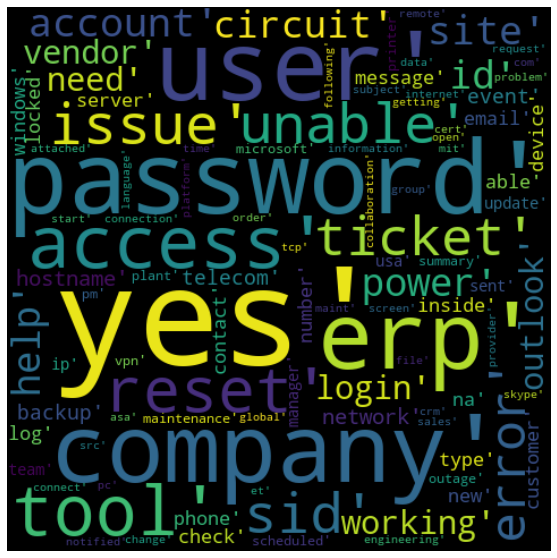

In [293]:
#check for the word count 100)
wordcloud_2 = WordCloud(width=480, height=480, max_words=100, collocations=False).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [294]:
new_df = df_bk.copy()
new_df['words'] = data_words_bigrams
new_df

,Short description,Caller,Assignment group,Languge,English_Description,number_of_words,words
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,verified user details employee manager checked...,20,"[verified, user, details, employee, manager, c..."
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,team meetings meetings appearing outlook cale...,9,"[team, meetings, meetings, appearing, outlook,..."
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,log vpn,2,"[log, vpn]"
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable access hr tool page,5,"[unable, access, hr, tool, page]"
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error,2,"[skype, error]"
...,...,...,...,...,...,...,...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue,3,"[telephony_software, issue]"
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip windows password reset tifpdchb pedxruyf,6,"[vip, windows, password, reset, tifpdchb, pedx..."
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP 62,Loading...,unable access machine utilities finish drawers...,9,"[unable, access, machine, utilities, finish, d..."
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP 49,Loading...,mehreren pc s lassen sich verschiedene prgramd...,12,"[mehreren, pc, lassen_sich, verschiedene, prgr..."


In [295]:
new_df['word_count']=new_df['English_Description'].apply(lambda x:len(str(x).split()))
new_df['char_counts']=new_df['English_Description'].apply(lambda x: char_counts(str(x)))
new_df['Digits_count']=new_df['English_Description'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
new_df['Avg_word_Count']=new_df['word_count']/new_df['char_counts']

In [296]:
new_df

,Short description,Caller,Assignment group,Languge,English_Description,number_of_words,words,word_count,char_counts,Digits_count,Avg_word_Count
0,login issue,spxjnwir pjlcoqds,GRP 0,Loading...,verified user details employee manager checked...,20,"[verified, user, details, employee, manager, c...",20,118,0,0.169492
1,outlook,hmjdrvpb komuaywn,GRP 0,Loading...,team meetings meetings appearing outlook cale...,9,"[team, meetings, meetings, appearing, outlook,...",9,65,0,0.138462
2,cant log in to vpn,eylqgodm ybqkwiam,GRP 0,Loading...,log vpn,2,"[log, vpn]",2,6,0,0.333333
3,unable to access hr tool page,xbkucsvz gcpydteq,GRP 0,Loading...,unable access hr tool page,5,"[unable, access, hr, tool, page]",5,22,0,0.227273
4,skype error,owlgqjme qhcozdfx,GRP 0,Loading...,skype error,2,"[skype, error]",2,10,0,0.200000
...,...,...,...,...,...,...,...,...,...,...,...
8496,telephony software issue,rbozivdq gmlhrtvp,GRP 0,Loading...,telephony software issue,3,"[telephony_software, issue]",3,22,0,0.136364
8497,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP 0,Loading...,vip windows password reset tifpdchb pedxruyf,6,"[vip, windows, password, reset, tifpdchb, pedx...",6,39,0,0.153846
8498,machine nÃ£o estÃ¡ funcionando,ufawcgob aowhxjky,GRP 62,Loading...,unable access machine utilities finish drawers...,9,"[unable, access, machine, utilities, finish, d...",9,66,0,0.136364
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP 49,Loading...,mehreren pc s lassen sich verschiedene prgramd...,12,"[mehreren, pc, lassen_sich, verschiedene, prgr...",12,66,0,0.181818


# Ends Here